# 生成数据集

In [6]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [7]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype = torch.float32)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# 添加噪声（噪声符合均值为0，标准差为0.01的正态分布）
# tensor()将numpy数组转换为Tensor对象
labels += torch.tensor(np.random.normal(0,0.01, size = labels.size()), dtype = torch.float32)

print(features[0],labels[0])
print(labels)

tensor([-1.0666,  0.5232]) tensor(0.2997)
tensor([ 2.9968e-01,  3.8547e-01,  7.2037e+00,  9.1679e+00,  4.7124e+00,
         1.3753e+00,  4.8960e+00,  5.1589e+00, -2.7397e+00,  4.2996e+00,
         1.1556e+01, -6.0946e+00,  6.1769e+00,  8.1528e+00,  4.2946e+00,
         1.2480e+01,  7.5270e+00,  9.5246e-01,  1.5419e+00,  9.2958e-01,
         3.6859e+00, -1.4137e+00,  4.5827e+00,  9.1171e+00,  4.2173e+00,
         5.2729e+00,  6.0362e+00,  1.3698e+01,  8.0821e+00,  6.1016e-01,
         3.3001e+00,  5.9072e+00,  3.2386e+00,  7.0231e+00,  6.0381e+00,
         2.9860e+00,  1.8598e+00,  7.8032e+00,  2.7288e+00,  5.2370e+00,
         2.9172e+00,  3.3091e-01,  8.1524e+00, -5.7582e-01,  7.2692e+00,
         1.6901e+01,  8.5934e-01,  1.0188e+01,  4.7350e+00,  1.1962e+00,
         6.2774e+00, -8.3228e-01,  1.1800e+01,  3.6165e+00,  4.8842e+00,
         1.2550e+00,  6.4518e+00,  8.0009e+00,  5.4683e-01,  1.0167e+01,
         3.3469e+00,  3.1859e+00,  2.9459e+00,  7.3294e+00,  4.6982e+00,
         

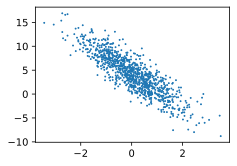

In [8]:
# 矢量图表示
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

# 读取数据

In [9]:
# 每次返回批量大小个随机样本的特征和标签
def data_iter(batch_size , features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本读取顺序随机
    for i in range(0, num_examples, batch_size):
        print(i)
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) #最后一次可能返回的不是完整的批量大小
        yield features.index_select(0, j), labels.index_select(0,j)

In [10]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break

0
tensor([[ 1.0099, -2.2006],
        [ 0.4021, -0.4314],
        [ 0.4461,  1.1039],
        [-0.8734,  1.4158],
        [ 0.8362,  0.6290],
        [ 0.8370,  0.5844],
        [ 1.4467, -0.7652],
        [ 0.0860,  0.8225],
        [ 0.7381, -0.5966],
        [ 1.7782, -0.0248]]) tensor([13.6985,  6.4625,  1.3562, -2.3620,  3.7420,  3.9053,  9.6984,  1.5783,
         7.7180,  7.8311])


# 初始化模型参数

In [11]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype = torch.float32)
b = torch.zeros(1,dtype = torch.float32)
print(b)

tensor([0.])


In [12]:
#之后的模型训练中，需要对这些参数求梯度来迭代参数的值，
# 因此我们要让它们的requires_grad=True。
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

# 定义模型

In [13]:
def linerReg(X, w, b):
    return torch.mm(X, w) + b # mm函数做矩阵乘法


# 定义损失函数

In [14]:
def squared_loss(y,y_hat):
    return (y_hat - y.view(y_hat.size())) **2 / 2 #将真实值y变形成y_hat的形状

# 定义优化算法

In [15]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

# 训练模型

In [16]:
lr = 0.03
num_epochs = 3
net = linerReg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features, labels):
        l = loss(net(X, w, b), y).sum() #小批量损失
        l.backward() #小批量的损失对模型的参数求梯度
        sgd([w,b], lr ,batch_size)
        
        #不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_loss = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_loss.mean().item()))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
epoch 1, loss 0.031196
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
epoch 2, loss 0.000125
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460

In [37]:
print(w,b) 
print(true_w,true_b)
#已经非常接近真实参数值：[2,-3.4] 和4.2

tensor([[ 1.9999],
        [-3.3994]], requires_grad=True) tensor([4.1998], requires_grad=True)
[2, -3.4] 4.2


# 简洁实现版本:

In [42]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

## 读取数据：torch.utils.data

In [44]:
import torch.utils.data as Data

batch_size = 10
dataSet = Data.TensorDataset(features,labels) # 将训练数据的特征和标签组合
data_iter = Data.DataLoader(dataSet, batch_size, shuffle=True)

for X, y in data_iter:
    print(X,y)
    break

tensor([[-1.3047, -1.2238],
        [ 0.6478,  1.0844],
        [-0.9540,  1.0839],
        [-0.2459,  0.0629],
        [ 0.2547,  1.3540],
        [ 0.3613,  0.6831],
        [-1.0134,  0.7148],
        [ 0.3389,  0.8437],
        [-0.0419,  0.1313],
        [-1.4616,  0.6134]]) tensor([ 5.7521,  1.8157, -1.3858,  3.4893,  0.1059,  2.5852, -0.2592,  1.9968,
         3.6838, -0.8088])


## 实现线性回归模型：nn.Module

In [ ]:
# nn的核心数据结构是Module，它是一个抽象概念
# Module可以表示某个层，或者表示一个包含很多层的神经网络
# 撰写自己的网络，一个nn.Module实例应该包含一些层，以及返回输出的前向传播方法

import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)
    
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)

### 使用nn.Sequential实现线性回归模型

In [58]:
#nn.Sequential写法1
net = nn.Sequential(
        nn.Linear(num_inputs, 1)
        #还可以传入其他层
)

#nn.Sequential写法2
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))

##nn.Sequential写法3
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('Linear', nn.Linear(num_inputs, 1))
    # ...
]))

In [60]:
#查看模型的所有可学习参数，此函数返回一个生成器
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.2190, -0.6882]], requires_grad=True)
Parameter containing:
tensor([-0.2463], requires_grad=True)


## 初始化模型参数：torch.nn.init

In [61]:
#使用PyTorch的init模块的初始化方法
from torch.nn import init

init.normal_(net[0].weight, mean = 0, std = 0.01) # 均值0，标准差为0.01的正态分布
init.constant_(net[0].bias, val = 0)
# net[0]这种访问子模块的写法，只有在net是一个ModuleList或者Squential实例时才可以

Parameter containing:
tensor([0.], requires_grad=True)

## 定义损失函数

In [62]:
# nn模块提供了各种损失函数，损失函数可以看做一种特殊的层。
loss = nn.MSELoss()

## 定义优化算法： torch.optim

In [63]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [66]:
print(optimizer.param_groups)

[{'params': [Parameter containing:
tensor([[ 0.0038, -0.0057]], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)], 'lr': 0.03, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


In [ ]:
# 1、为不同的子网络设置不同的学习率（finetune中使用）
optimizer2 = optim.SGD([
    {'params': net.base.parameters()}, 
    {'params': net.subnet1.parameters(), 'lr' : 0.01}
], lr = 0.03)# model.base的学习率采用0.03，subnet1的学习率采用0.01

# 2、动态调整学习率：修改param_groups对应的学习率
for param in optimizer.param_groups:
    param_groups['lr'] *= 0.1 

## 训练模型

In [70]:
num_epochs = 3
for epoch in  range(1, num_epochs + 1):
    for X,y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1,1)) # -1 表示x轴的维度又y轴的维度自动决定
        optimizer.zero_grad() # 梯度清零
        l.backward()
        optimizer.step() # 更新所有的参数，在backward之后调用
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000441
epoch 2, loss: 0.000132
epoch 3, loss: 0.000046


In [71]:
dense = net[0] #从net获取所需要的层
print(true_w, dense.weight)
print(true_b,dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9996, -3.4011]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2000], requires_grad=True)
